<a href="https://colab.research.google.com/github/TeraneAgaeva/Data-Analysis-course-/blob/main/%22Final_Project_Grocery_store_sales_analysis_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau!
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх,
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно**

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql.

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga.
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

In [1]:
!pip install openpyxl

In [2]:
# завантажуємо необхідні бібліотеки

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.stats.api as sms
from math import ceil

%matplotlib inline
from scipy.stats import norm
from scipy.stats import shapiro, normaltest
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro, normaltest

In [3]:
# підключаємо гугл-диск

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# до файлу підключитись вдалось змінивши назву - прибравши пробіл у назві

!ls drive/MyDrive/Grocery_Database.xlsx

drive/MyDrive/Grocery_Database.xlsx


Ось так можемо переглянути, які є листки в Excel файлі:

In [5]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'drive/MyDrive/Grocery_Database.xlsx'

In [6]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

# **1. Початковий аналіз вхідних даних та підготовка даних**

А так можемо зчитати конкретний листок:

In [7]:
descr1 = xl.parse('Fact Summary')

descr1

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [8]:
descr2 = xl.parse('Grosto DB')

descr2

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [9]:
df = pd.read_excel(path_to_file)

In [10]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [11]:
df.shape

print(f'Набір містить {df.shape[0]} та {df.shape[1]} колонок.')


Набір містить 50447 та 32 колонок.


Набір даних невеликий. Можемо відктири та аналізувати в Excel, Access, Python чи SQL. Продовжимо аналіз в SQL

In [12]:
# перевірка на дублі

df[df.duplicated()]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [13]:
# після виявлення аналізуємо дубль

df[df['Receipt Number'] == "GSB00094"]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [14]:
# для подальшого аналізу видаляємо один з рядків, що дублюється та оновлюємо порядок індексів у базі

df = df.drop(index = 32664).reset_index(drop=True)

In [15]:
# аналізуємо чи пройшло видалення успішно

df[df['Receipt Number'] == "GSB00094"]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [16]:
# перевірка на незаповнені значення

df.isnull().sum()

,0
Receipt Number,0
Date,0
Year,0
Month,0
Time,0
Mobile Number,0
Membership ID,0
Loyalty Card Points,0
Age,0
Gender,0


In [17]:
# Перевіримо суму по Profit Margin, Operating Cost та Product Cost для подальшого аналізу до округлення

print(df['Profit Margin'].sum(), df['Operating Cost'].sum(), df['Product Cost'].sum())

60620.85273 87113.84249999998 433024.25477


In [18]:
# аналіз даних за їх типами

df.dtypes

,0
Receipt Number,object
Date,datetime64[ns]
Year,int64
Month,int64
Time,object
Mobile Number,int64
Membership ID,object
Loyalty Card Points,int64
Age,int64
Gender,object


Для деяких полів є сенс округлити до 2 знаків після коми. Наприклад, Profit Margin, Operating Cost та Product Cost адже більш читабельно візуально коли меньше знаків.

In [19]:
# загальна інформація по таблиці

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50446 entries, 0 to 50445
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50446 non-null  object        
 1   Date                 50446 non-null  datetime64[ns]
 2   Year                 50446 non-null  int64         
 3   Month                50446 non-null  int64         
 4   Time                 50446 non-null  object        
 5   Mobile Number        50446 non-null  int64         
 6   Membership ID        50446 non-null  object        
 7   Loyalty Card Points  50446 non-null  int64         
 8   Age                  50446 non-null  int64         
 9   Gender               50446 non-null  object        
 10  City                 50446 non-null  object        
 11  Country              50446 non-null  object        
 12  Category             50446 non-null  object        
 13  Sub_Category         50446 non-

Вирішила для зручності аналізу даних зробити копію бази та працюівати з копією, щоб в будь-який момент легко повернутися до первісних даних, враховуючи, що первісний набір даних невеликий. При необхідності внести зміни у первісну базу - буде обговорено з відділом продажів.

In [20]:
df1 = df.copy()

In [21]:
# Округлимо дані та округлення збережемо в базі даних df

df1['Profit Margin'] = df1['Profit Margin'].round(2)
df1['Operating Cost'] = df1['Operating Cost'].round(2)
df1['Product Cost'] = df1['Product Cost'].round(2)

In [22]:
# Перевіримо суму по Profit Margin, Operating Cost та Product Cost для подальшого аналізу після округлення

print(df1['Profit Margin'].sum(), df1['Operating Cost'].sum(), df1['Product Cost'].sum())

60619.1 87107.61999999998 433018.79


Бачемо значення суми з кількістю знаків після суми більше ніж 2 знаки. На всяк випадок робимо перевірку чи дійзно значення округлились до 2 знаків:

In [23]:
# Перевіримо чи округлені значення до 2 знаків:

print(df1['Profit Margin'].round(2).equals(df1['Profit Margin']))
print(df1['Operating Cost'].round(2).equals(df1['Operating Cost']))
print(df1['Product Cost'].round(2).equals(df1['Product Cost']))

True
True
True


Враховуючи, що всі значення округлені до 2х знаків. Скоріше за все проблема у відображенні даних.

In [24]:
# проблема з додаванням поля Description в зведену таблицю. Аналізуємо назви полів

print(df1.columns)


Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')


Бачимо, що назва 'Description ' має пробіл. Потрібно прибрати пробіл з назви

In [25]:
# прибирираємо пробіл в назві поля

df1.rename(columns={'Description ': 'Description'}, inplace=True)


In [26]:
# Краще перевірити всі назви полів на пробіли та прибрати пробіли у назвах

df1.columns = df1.columns.str.strip()


# **2. Перевірка розрахункових полів**

Перевіримо розрахунок у полях: Gross Bill Amount, Net Bill Amount та Amount

In [27]:
# Перевіряємо розрахунок у Amount. Створимо тимчасове поле Amount1 та Amount_check

df1['Amount1'] = (df1['Price'].round(2) - (df1['Price'].round(2) * df1['DISC'].round(2))) * df1['QTY'].round(2)
df1['Amount_check'] = df1['Amount1'].round(2) - df1['Amount'].round(2)
df1['Amount_check'].sum()

#Висновок:

if df1['Amount_check'].sum() == 0:
    print("Дані розраховані вірно у полі Amount.")
elif abs(df1['Amount_check'].sum()) > 10:
    print(f"Дані розраховані не вірно у полі Amount, є помилка. Потрібен глибший аналіз - обговорити з відділом продажів. Загальна сума різниці {df1['Amount_check'].sum().round(2)} по полю.")
else:
    print(f"Загальне відхилення по полю до 10 доларів не є суттєвим. Дані розраховані вірно у полі Amount. Загальна сума різниці {df1['Amount_check'].sum().round(2)} по полю.")


Загальне відхилення по полю до 10 доларів не є суттєвим. Дані розраховані вірно у полі Amount. Загальна сума різниці 0.91 по полю.


In [28]:
# Перевіряємо розрахунок у Gross Bill Amount. Створимо тимчасове поле GrossBillAmount1 та GrossBillAmount_check

df1['GrossBillAmount1'] = df1['Net Bill Amount'] + df1['Net Bill Amount'] * df1['GST']
df1['GrossBillAmount_check'] = df1['GrossBillAmount1'].round(2) - df1['Gross Bill Amount'].round(2)
df1['GrossBillAmount_check'].sum()

#Висновок:

if df1['GrossBillAmount_check'].sum() == 0:
    print("Дані розраховані вірно у полі Gross Bill Amount.")
elif abs(df1['GrossBillAmount_check'].sum()) > 10:
    print(f"Дані розраховані не вірно у полі Gross Bill Amount, є помилка. Потрібен глибший аналіз - обговорити з відділом продажів. Загальна сума різниці {df1['GrossBillAmount_check'].sum().round(2)} по полю.")
else:
    print(f"Загальне відхилення по полю до 10 доларів не є суттєвим. Дані розраховані вірно у полі Gross Bill Amount. Загальна сума різниці {df1['GrossBillAmount_check'].sum().round(2)} по полю.")


Дані розраховані вірно у полі Gross Bill Amount.


In [29]:
# Перевіряємо розрахунок у Net Bill Amount. Створимо тимчасове поле NetBillAmount1 та NetBillAmount_check

df1['NetBillAmount1'] = df1.groupby(['Receipt Number'])['Amount'].transform('sum')
df1['NetBillAmount_check'] = df1['NetBillAmount1'] - df1['Net Bill Amount']
df1['NetBillAmount_check'].sum()

#Висновок:

if df1['NetBillAmount_check'].sum() == 0:
    print("Дані розраховані вірно у полі Net Bill Amount.")
elif abs(df1['NetBillAmount_check'].sum()) > 10:
    print(f"Дані розраховані не вірно у полі Net Bill Amount, є помилка. Потрібен глибший аналіз - обговорити з відділом продажів. Загальна сума різниці {df1['NetBillAmount_check'].sum().round(2)} по полю.")
else:
    print(f"Загальне відхилення по полю до 10 доларів не є суттєвим. Дані розраховані вірно у полі Net Bill Amount. Загальна сума різниці {df1['NetBillAmount_check'].sum().round(2)} по полю.")



Дані розраховані не вірно у полі Net Bill Amount, є помилка. Потрібен глибший аналіз - обговорити з відділом продажів. Загальна сума різниці -140063.89 по полю.


ВИСНОВОК: Знайдено помилку у даних. У подальшому аналізі поля Net Bill Amount та Gross Bill Amount використовувати не можна. При необхідності тимчасово використовуємо поле  NetBillAmount1 та GrossBillAmount2 (розрахуємо від поля NetBillAmount1). Потрібно обговорити з відділом продажів знайдені помилки.

In [30]:
# Розрахунок поля GrossBillAmount2

df1['GrossBillAmount2'] = df1['NetBillAmount1'] + df1['NetBillAmount1'] * df1['GST']

# **ПИТАННЯ, ЩОДО АНАЛІЗУ БІЗНЕСУ**

### **1. Питання:** розглянемо Profit Margin, Operating Cost та Product Cost по країнах та містах. Де більший прибуток та де більше витрат.




In [31]:
# Побудуємо зведену таблицю

pivot_table = df1.groupby(['Country', 'City'])[['Profit Margin', 'Product Cost', 'Operating Cost']].sum().sort_values(by='Profit Margin', ascending=False)

pivot_table



,,Profit Margin,Product Cost,Operating Cost
Country,City,,,
Singapore,Bedok,14648.65,104194.33,20970.82
Philippines,Manila,14454.95,102923.02,20713.01
Malaysia,Kuala Lumpur,12957.65,93247.36,18741.19
Indonesia,Jakarta,11068.78,79213.45,15930.90
Singapore,Woodlands,7489.07,53440.63,10751.70


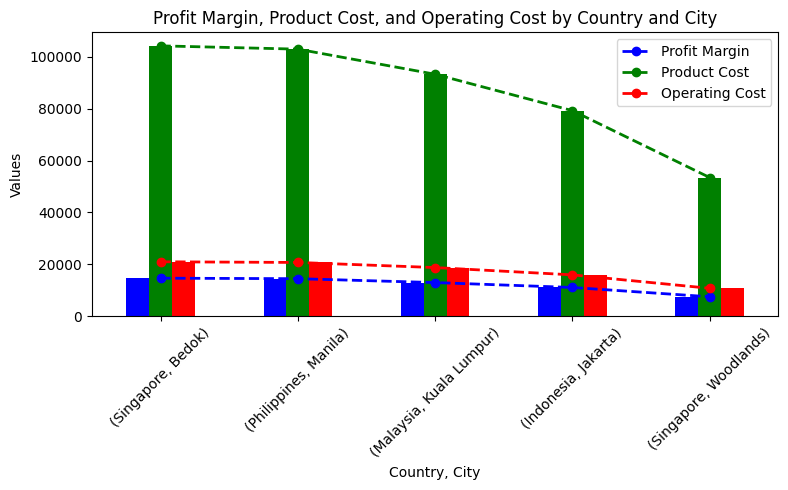

In [32]:
# Створюємо графік
fig, ax = plt.subplots(figsize=(8, 5))

# бар-чарт для всіх показників
pivot_table[['Profit Margin', 'Product Cost', 'Operating Cost']].plot(kind='bar',  ax = ax, color = ['blue', 'green', 'red']) #ax = ax дає змогу розмістити графіки на одній осі

# Додаємо лінії до кожного показника
pivot_table[['Profit Margin', 'Product Cost', 'Operating Cost']].plot(kind='line',  ax = ax, color = ['blue', 'green', 'red'], linewidth=2, marker='o', linestyle='--')

# Налаштування графіка
ax.set_title('Profit Margin, Product Cost, and Operating Cost by Country and City')
ax.set_xlabel('Country, City')
ax.set_ylabel('Values')
ax.legend(['Profit Margin', 'Product Cost', 'Operating Cost'])

# Поворот міток осі X для ліпшого відображення
plt.xticks(rotation=45)

plt.tight_layout() # для більш якісного розміщення та щоб графіки не перекривались.
plt.show()



In [33]:
max_profit_city = pivot_table['Profit Margin'].idxmax()

print(f"Філіал з найвищим прибутком розташований в місті: {max_profit_city}")

Філіал з найвищим прибутком розташований в місті: ('Singapore', 'Bedok')


In [34]:
max_profit_city = pivot_table['Profit Margin'].idxmin()

print(f"Філіал з найнижчим прибутком розташований в місті: {max_profit_city}")

Філіал з найнижчим прибутком розташований в місті: ('Singapore', 'Woodlands')


**Висновок 1:** бачимо, що компанія веде бізнес у 5 країнах, у кожній країні представлено одне місто, крім Singapore. У Singapore 2 міста. Аналізуючи по Країнам бачимо, що найбільший маржинальний прибуток у Країні Singapore, при цьому у місті Bedok, але і витрати більші саме в цій країні та місті. Можемо сказати також, що операційні витрати та собівартість продукції відповідає динаміці маржинального прибутку, тобто у Bedok найбільший маржинальний прибуток, але і витрати найбільші, при цьому у Woodlands	витрати найменші, порівняно з іншими містами. На побудованій візуалізації описана динаміка відповідає. На мій погляд потрібно більше вивчити прибутковість Woodlands, адже це велике місто у Сінгапурі, туристичній країні - можливо є варіанти збільшення маржинального прибутку.

**2. Питання:** Яке співвідношення маржинального прибутку та витрат по кожному місту

In [35]:
pivot_table['ProfitMargin_to_ProdCost'] = (pivot_table['Profit Margin']/pivot_table['Product Cost']).round(4)
pivot_table['ProfitMargin_to_OpCost'] = (pivot_table['Profit Margin']/pivot_table['Operating Cost']).round(4)
pivot_table

,,Profit Margin,Product Cost,Operating Cost,ProfitMargin_to_ProdCost,ProfitMargin_to_OpCost
Country,City,,,,,
Singapore,Bedok,14648.65,104194.33,20970.82,0.1406,0.6985
Philippines,Manila,14454.95,102923.02,20713.01,0.1404,0.6979
Malaysia,Kuala Lumpur,12957.65,93247.36,18741.19,0.1390,0.6914
Indonesia,Jakarta,11068.78,79213.45,15930.90,0.1397,0.6948
Singapore,Woodlands,7489.07,53440.63,10751.70,0.1401,0.6965


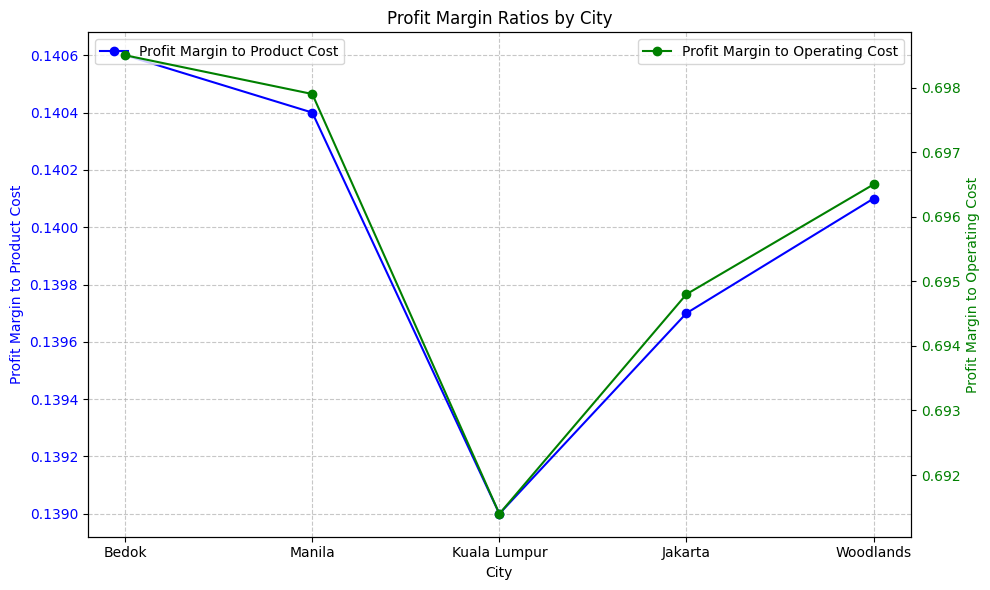

In [36]:
# Сброс індекса для використання 'City' як поля
pivot_table = pivot_table.reset_index()

# Створюємо графік
fig, ax1 = plt.subplots(figsize=(10, 6))

# Додаємо першу лінію і першу вісь Y
ax1.plot(pivot_table['City'], pivot_table['ProfitMargin_to_ProdCost'], marker='o', label='Profit Margin to Product Cost', color='blue')
ax1.set_xlabel('City')
ax1.set_ylabel('Profit Margin to Product Cost', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Створюємо другу вісь Y, яка ділить ту ж саму вісь X
ax2 = ax1.twinx()
ax2.plot(pivot_table['City'], pivot_table['ProfitMargin_to_OpCost'], marker='o', label='Profit Margin to Operating Cost', color='green')
ax2.set_ylabel('Profit Margin to Operating Cost', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка графіка
ax1.set_title('Profit Margin Ratios by City')
ax1.grid(True, linestyle='--', alpha=0.7)

# Легенда
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Поворот міток осі X
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Висновок 2:** відсоток маржі до витрат найнижчий у Kuala Lumpur	та Jakarta, тобто в цих містах для отримання маржі потрібно більше витрат понести ніж у інших містах. Це стосується і операційних витрат і собівартості. Тобто потрібно детальніше проаналізувати витрати та собівартість, щоб зрозуміти чи є можливість знизити відсоток витрат відносно маржі.

**3. Питання:** В якій країні найнижчий та в якій найвижчий податок. Як це впливає на суму продажів та як впливає на маржинальний прибуток?

In [37]:
# Побудуємо зведену таблицю

pivot_table1 = df1.pivot_table(values=['Profit Margin', 'Amount',], index=['GST', 'Country'], aggfunc='sum').sort_values(by='Profit Margin', ascending=False).round(2)

pivot_table1

,,Amount,Profit Margin
GST,Country,,
0.07,Singapore,205165.79,22137.72
0.12,Philippines,133987.50,14454.95
0.06,Malaysia,121219.35,12957.65
0.10,Indonesia,103013.60,11068.78


**Висновок 3:** Як можемо бачити у зведеній таблиці найбільший маржинальний прибуток та найбільші продажі у країні Singapore, при цьому податок не найнижчий, але достатньо низький. При цьому найменші продажі та прибуток у країні Indonesia, але податок в цій країні не найнижчий. Максимальний податок у Philippines, а мінімальний у Malaysia, але продажі та прибуток в цих країнах середній. Отже розмір податку не дуже впливає на розмір продажів та прибуток.

**4. Питання:** Чи впливає час здійснення купівлі на об'єм купівель?

In [38]:
# Створення параметру повної дати та часу

df1['Date_time'] = df1['Date'].astype(str) + ' ' + df1['Time'].astype(str)


In [39]:
# Зміна формату дати та часу

def parse_datetime(value):
    for fmt in ('%Y-%m-%d %H:%M:%S.%f', '%Y-%m-%d %H:%M:%S'):
        try:
            return pd.to_datetime(value, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT

df1['Date_time'] = df1['Date_time'].apply(parse_datetime)

In [40]:
# Створення окремого поля з годинами

df1["Hour"] = df1["Date_time"].dt.hour

In [41]:
# розрахунок кореляції

pearson_correlation = np.corrcoef(df1['Hour'], df1['QTY'])[0, 1]
pearson_correlation

0.00957119375392019

In [42]:
# Подивимось глибше по діапазонам. Функція для визначення часу доби

def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# Применяем функцию к каждому значению в столбце Hour
df1['Time_of_Day'] = df1['Hour'].apply(get_time_of_day)

In [43]:
pivot_table2 = df1.pivot_table(values='Amount', index=['Time_of_Day'], aggfunc='sum').sort_values(by='Amount', ascending=False).round(2)

pivot_table2

,Amount
Time_of_Day,
afternoon,280418.35
evening,191973.65
morning,90994.24


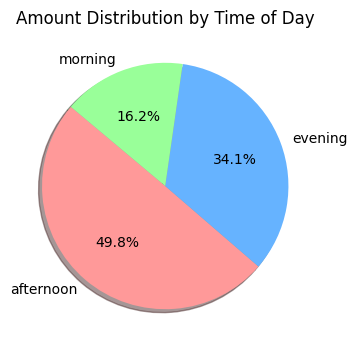

In [44]:
# для кращої візуалізації побудуємо кругову діаграму:

pivot_table2.plot.pie(y='Amount', labels=pivot_table2.index, colors=['#ff9999', '#66b3ff', '#99ff99'],
                      autopct='%1.1f%%',shadow=True, startangle=140,
                      legend=False, figsize=(4, 4))


plt.title('Amount Distribution by Time of Day')
plt.ylabel('')  # прибрати мітку осі Y
plt.show()

**Висновок 4:** Коефіцієнт кореляції Пірсона r=0.009571 близький до нуля і вказує на вкрай слабкий лінійний зв'язок між змінними 'Hour' та 'QTY'. Проте найбільше купують вдень (видно зі зведеної таблиці та діаграми), тому робити цілодобові магазини сенсу немає. Але є сенс детальніше погодинно зробити аналіз.

**5. Питання:** Чи є сенс збільшити час роботи магазинів? Як це вплине на дохідність?

In [45]:
# Побудуємо зведену таблицю

pivot_table3 = df1.pivot_table(values=['Amount', 'Profit Margin'], index=['Hour'], aggfunc='sum').sort_values(by='Amount', ascending=False).round(2)

pivot_table3

,Amount,Profit Margin
Hour,,
20,49494.13,5308.18
13,48552.23,5270.74
21,48364.87,5253.26
18,47916.29,5081.85
15,47914.63,5094.32
17,46707.24,5043.11
12,46220.94,4984.29
19,46198.36,4944.76
10,46080.20,4981.70


In [46]:
# Маржа середня на 1 рік по 12 годин роботи магазинів

Year_Profit_Margin = pivot_table3['Profit Margin'].sum()/4
Year_Profit_Margin

15154.774999999998

In [47]:
# Додаткова можлива маржа на рік при роботі магазинів додатково 3 години

Additional_Profit_Margin = (pivot_table3['Profit Margin'].sum()/4/12)*3
Additional_Profit_Margin

3788.6937499999995

In [48]:
# приріст маржі на рік

Inc_Profit_Margin = Additional_Profit_Margin/Year_Profit_Margin
Inc_Profit_Margin

0.25

In [49]:
# Можна зпрогнозувати збільшення годин роботи магазину та очікування маржі

# Вхідні дані
alpha = 0.05
hours_original = df1['Hour']
margin_original = df1['Profit Margin']

# Генерація даних очікуваного збільшення на 3 години на день та збільшення маржі на 25%
hours_increased = hours_original + (3*365*4)
margin_increased = margin_original * (1 + Inc_Profit_Margin)

# Розрахунок середнього та стандартного відхилення для вхідних даних
mean_original = np.mean(margin_original)
std_original = np.std(margin_original, ddof=1)  # ddof=1 для вибіркового стандартного відхилення

# Проведення z-теста для перевірки гіпотези

# Перевіряєм збільшення маржі на 25%
z_stat, p_value = ztest(margin_increased, value = mean_original, alternative='larger')

print(f"Z-статистика: {z_stat}, P-value: {p_value}")

Z-статистика: 50.7521073815923, P-value: 0.0


In [50]:
#Висновок:
if(p_value <  alpha):
    print("Відхилити Н0, дані не мають нормальний розподіл. Тобто зі збільшенням на 3 години роботи магазинів маржа збільшиться на 25%")
else:
    print("Н0 не може бути відхилена, дані мають нормальний розподіл. При збільшенні годин роботи магазинів збільшення маржі до 25% не буде")

Відхилити Н0, дані не мають нормальний розподіл. Тобто зі збільшенням на 3 години роботи магазинів маржа збільшиться на 25%


**Висновок 5:** Бізнесу потрібно збільшувати години роботи магазинів на 3 години. Зі збільшенням на 3 години роботи магазинів маржа збільшиться на 25%. Це зумовлено тим, що магазини працюють в туристичних містах та в деяких є аеропорти.

**6. Питання:** Яка категорія товарів є найприорітетніша?

In [51]:
# Розрахуємо загальний прибуток по полю 'Profit Margin'

total_profit_margin = df1['Profit Margin'].sum()

In [52]:
# Виводимо зведену таблицю за спаданням по полю Profit Margin

pivot_table4 = df1.groupby(['Category'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum().sort_values(by='Profit Margin', ascending=False).reset_index()

In [53]:
# Додаємо колонку з % маржі по кожній группі поля Category

pivot_table4['Cumulative Profit Margin'] = pivot_table4['Profit Margin'].cumsum() / total_profit_margin
pivot_table4

,Category,Profit Margin,Product Cost,Amount,QTY,Cumulative Profit Margin
0,Frozen,9262.12,55844.03,74296.7194,9907,0.152792
1,Beauty,7990.07,61380.87,79185.5923,8089,0.284600
2,Bakery & Breakfast,6224.32,40354.37,53162.5921,10526,0.387279
3,Pet Care,4460.11,26801.97,35699.7611,5272,0.460855
4,Fruit & Vegetable,4387.40,27844.90,36783.0941,6815,0.533232
5,Mother & Baby,4261.56,27754.71,36549.9824,3154,0.603532
6,Meat & Seafood,4166.65,30011.58,38975.0958,3369,0.672267
7,"Wines, Beers & Spirits",3655.00,26715.04,34641.1768,2656,0.732562
8,"Choco, Snacks, Sweets",2956.73,19865.64,26060.0847,4652,0.781337
9,"Dairy, Chilled & Eggs",2668.36,28391.89,35460.4534,5292,0.825356


In [54]:
# Визначаємо категорії, котрі складають 10% доходу
categories_10_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.1]

# Посмотрим на результат
print(categories_10_percent)


Empty DataFrame
Columns: [Category, Profit Margin, Product Cost, Amount, QTY, Cumulative Profit Margin]
Index: []


In [55]:
# Визначаємо категорії, котрі складають 20% доходу
categories_20_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.2]

# Переглянемо результат
print(categories_20_percent)


  Category  Profit Margin  Product Cost      Amount   QTY  \
0   Frozen        9262.12      55844.03  74296.7194  9907   

   Cumulative Profit Margin  
0                  0.152792  


In [56]:
# Визначаємо категорії, котрі складають 50% доходу - найпріорітетніші
categories_50_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.5]

# Переглянемо результат
print(categories_50_percent)

             Category  Profit Margin  Product Cost      Amount    QTY  \
0              Frozen        9262.12      55844.03  74296.7194   9907   
1              Beauty        7990.07      61380.87  79185.5923   8089   
2  Bakery & Breakfast        6224.32      40354.37  53162.5921  10526   
3            Pet Care        4460.11      26801.97  35699.7611   5272   

   Cumulative Profit Margin  
0                  0.152792  
1                  0.284600  
2                  0.387279  
3                  0.460855  


In [57]:
# Визначаємо категорії, котрі складають 80% доходу - пріорітетні
categories_80_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.8]

# Переглянемо результат
print(categories_80_percent)

                 Category  Profit Margin  Product Cost      Amount    QTY  \
0                  Frozen        9262.12      55844.03  74296.7194   9907   
1                  Beauty        7990.07      61380.87  79185.5923   8089   
2      Bakery & Breakfast        6224.32      40354.37  53162.5921  10526   
3                Pet Care        4460.11      26801.97  35699.7611   5272   
4       Fruit & Vegetable        4387.40      27844.90  36783.0941   6815   
5           Mother & Baby        4261.56      27754.71  36549.9824   3154   
6          Meat & Seafood        4166.65      30011.58  38975.0958   3369   
7  Wines, Beers & Spirits        3655.00      26715.04  34641.1768   2656   
8   Choco, Snacks, Sweets        2956.73      19865.64  26060.0847   4652   

   Cumulative Profit Margin  
0                  0.152792  
1                  0.284600  
2                  0.387279  
3                  0.460855  
4                  0.533232  
5                  0.603532  
6                  

In [58]:
# сума маржі по пріорітетним категоріям товарів, що дають 80% прибутку

total_sum_cat_80_percent = categories_80_percent['Profit Margin'].sum()

In [59]:
total_sum_margin = df1['Profit Margin'].sum()

print(total_sum_cat_80_percent, total_sum_margin, total_sum_cat_80_percent/total_sum_margin)

47363.96000000001 60619.1 0.7813372352938267


In [60]:
# Розрахуємо персентиль 50% для поля 'Profit Margin'
quantile_profit_margin = pivot_table4['Profit Margin'].quantile(0.5)

# Відфільтруємо категорії товарів, що сумарно дають 50% доходу
categories_50_percentl = pivot_table4[pivot_table4['Profit Margin'] >= quantile_profit_margin]

# Переглянемо результат
print(categories_50_percentl)


                 Category  Profit Margin  Product Cost      Amount    QTY  \
0                  Frozen        9262.12      55844.03  74296.7194   9907   
1                  Beauty        7990.07      61380.87  79185.5923   8089   
2      Bakery & Breakfast        6224.32      40354.37  53162.5921  10526   
3                Pet Care        4460.11      26801.97  35699.7611   5272   
4       Fruit & Vegetable        4387.40      27844.90  36783.0941   6815   
5           Mother & Baby        4261.56      27754.71  36549.9824   3154   
6          Meat & Seafood        4166.65      30011.58  38975.0958   3369   
7  Wines, Beers & Spirits        3655.00      26715.04  34641.1768   2656   

   Cumulative Profit Margin  
0                  0.152792  
1                  0.284600  
2                  0.387279  
3                  0.460855  
4                  0.533232  
5                  0.603532  
6                  0.672267  
7                  0.732562  


**Висновок 6:** Проаналізувавши вище групи товарів за прибутковістю, бачимо, що є група Frozen товарів яка дає 20% доходності та виділили найприорітетніші групи, що дають 50% та пріортітетні дають 80% маржі. Від цих товарів залежить в основному прибутковість компанії, тому важливо розвивати ці напрямки. Підрахувавши 50% персентиль, бачимо, що групи товарів, які дають 80% маржі входять в 50% персентиль майже всі, крім групи товарів "Choco, Snacks, Sweets" - це говорить про те, що половина категорій товару дає 80% прибутку. Бажано детальніше вивчити товари, що увійшли в категорії найпріорітетніших та пріорітетних. Проаналізувати товари по динаміці в роках, по країнах, розглянути можливість знизити Product Cost. Також важливо розглянути товари, що не потрапили в категорії пріорітетних - необхідно оцінити попит на них, співставити ціну та маржинальність, собівартість щоб зрозуміти чи можна далі розвивати ці напрямки чи краще відмовитись від деяких з них на користь більш прибуткових та затребуваних.

**7. Питання:** Яке співвідношення ціни та маржі по магазинам?

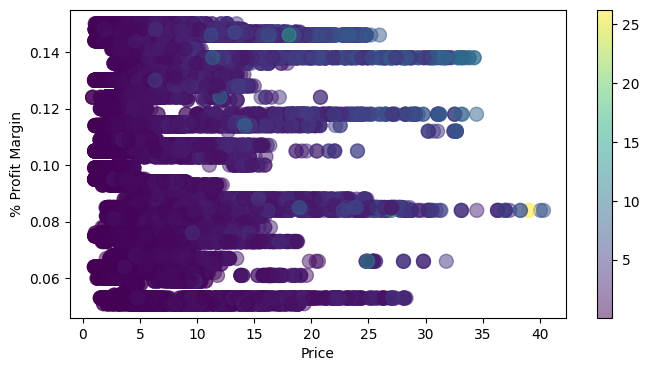

In [61]:
# Побудуємо діаграму розсіювання для аналізу:

col_x = 'Price'
col_y = '% Profit Margin'
color_feature = 'Profit Margin'

plt.figure(figsize=(8,4))
plt.scatter(df[col_x], df[col_y], alpha=0.5,
            s=100, c=df[color_feature])
plt.xlabel(col_x)
plt.ylabel(col_y)
# Додавання шкали кольорів
plt.colorbar();

**Висновок 7:** Аналізуючи діаграму розсіювання  можемо зробити висновок, що сума маржинального прибутку вища при вищий ціні, що вище 7 дол. Основна  сума маржинального  прибутку отримана від товарів до 10 дол. , при цьому рівень маржинальності товару може бути різній при одній і тій самій ціні. Наприклад при ціні 5 дол. маржинальність може бути до 16%. Важливим показником буде ще аналіз попиту

**8. Питання:** Глибше проаналізуємо дохідність за товарами та за пріорітетними товарами, чи прослідковується спільна динаміка? Чи присутня сезонність продажів?

In [62]:
# Для зручності аналізу додамо поле Month_Year

df1['Month_Year'] = df1.apply(lambda row: f"{row['Month']:02d}-{row['Year']}", axis=1)


In [63]:
# Будуємо зведену таблицю для подальшого аналізу прибутковості товарів

pivot_table5 = df1.groupby(['Category', 'Items', 'Description', '% Profit Margin', '% Product Cost', 'Month', 'Year', 'Month_Year', 'City', 'Brand', 'Price'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum().sort_values(by='Profit Margin', ascending=False).reset_index()

In [64]:
# Змінюємо формат деяких полів

pivot_table5 = pivot_table5.astype({'% Profit Margin': 'float', '% Product Cost': 'float'})
pivot_table5

,Category,Items,Description,% Profit Margin,% Product Cost,Month,Year,Month_Year,City,Brand,Price,Profit Margin,Product Cost,Amount,QTY
0,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2019,12-2019,Bedok,Cascadiam Farm,13.31,29.35,140.36,195.7901,15
1,"Wines, Beers & Spirits",Bollinger Pink platted moscato rose,750 ml,0.084,0.766,12,2019,12-2019,Kuala Lumpur,Bollinger,39.04,26.23,239.24,299.8272,8
2,Frozen,Seafood canadian scallops,540 g,0.146,0.704,12,2019,12-2019,Kuala Lumpur,Catch Seafood,22.15,25.87,124.75,168.3400,8
3,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,3,2019,03-2019,Bedok,Cascadiam Farm,13.31,21.52,102.92,142.8163,11
4,Mother & Baby,Dumex baby milk formula,840 g,0.138,0.712,12,2017,12-2017,Jakarta,Dumex,27.01,18.64,96.16,132.3490,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44148,Rice & Cooking Essentials,Morton Fine salt,280 g,0.064,0.786,4,2017,04-2017,Bedok,Morton,1.15,0.07,0.90,1.0925,1
44149,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,0.064,0.786,12,2018,12-2018,Manila,Lee Kum Kee,1.06,0.07,0.83,1.0176,1
44150,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,0.064,0.786,1,2019,01-2019,Jakarta,Lee Kum Kee,1.06,0.07,0.83,1.0070,1
44151,"Choco, Snacks, Sweets",Mentos Mint Bag 50s Chewy Deagees,160 g,0.060,0.790,3,2019,03-2019,Jakarta,Mentos,1.23,0.07,0.97,1.1931,1


In [65]:
# маржа та витрати по періодам

pivot_table6 = df1.groupby(['Month_Year', 'Month', 'Year'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum()
pivot_table6 = pivot_table6.sort_values(by=['Year', 'Month'], ascending=[True, True]).reset_index()

pivot_table6

,Month_Year,Month,Year,Profit Margin,Product Cost,Amount,QTY
0,01-2016,1,2016,955.79,6843.70,8894.5104,1220
1,02-2016,2,2016,959.64,6772.02,8814.0834,1237
2,03-2016,3,2016,919.11,6587.51,8560.6094,1206
3,04-2016,4,2016,1004.64,6948.53,9073.3672,1274
4,05-2016,5,2016,995.52,7096.98,9226.8476,1287
5,06-2016,6,2016,1026.14,7256.19,9446.1532,1271
6,07-2016,7,2016,977.36,7002.53,9119.1095,1253
7,08-2016,8,2016,1091.30,7787.80,10139.9460,1411
8,09-2016,9,2016,1057.66,7673.19,9972.7338,1321
9,10-2016,10,2016,1057.72,7610.99,9911.1945,1298


In [66]:
# Поєднуємо таблиці по полю 'Category'

pivot_table7 = pd.merge(pivot_table5, categories_80_percent[['Category']], on='Category', how='inner')

# Перевірка результату

pivot_table7['Category'].value_counts()

,count
Category,
Bakery & Breakfast,6349
Frozen,5666
Beauty,5182
Fruit & Vegetable,3539
"Choco, Snacks, Sweets",2447
Meat & Seafood,2136
Pet Care,2085
Mother & Baby,2058
"Wines, Beers & Spirits",1157


In [67]:
# Вибірка приорітетних товарів

pivot_table7

,Category,Items,Description,% Profit Margin,% Product Cost,Month,Year,Month_Year,City,Brand,Price,Profit Margin,Product Cost,Amount,QTY
0,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2019,12-2019,Bedok,Cascadiam Farm,13.31,29.35,140.36,195.7901,15
1,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,3,2019,03-2019,Bedok,Cascadiam Farm,13.31,21.52,102.92,142.8163,11
2,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2019,12-2019,Jakarta,Cascadiam Farm,13.31,17.61,84.21,113.8005,9
3,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,2,2017,02-2017,Bedok,Cascadiam Farm,13.31,15.66,74.86,102.7532,8
4,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2018,12-2018,Jakarta,Cascadiam Farm,13.31,15.65,74.85,103.0194,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30614,Bakery & Breakfast,Chocolate bread,114g,0.075,0.775,10,2016,10-2016,Jakarta,RedMart,1.09,0.08,0.84,1.0355,1
30615,Bakery & Breakfast,Hokkaido Milk Toast Bread,845g,0.075,0.775,11,2016,11-2016,Manila,Gardenia,1.03,0.08,0.80,1.0197,1
30616,Bakery & Breakfast,California raisin loaf,738g,0.075,0.775,6,2017,06-2017,Kuala Lumpur,Krispllos,1.05,0.08,0.81,1.0185,1
30617,Bakery & Breakfast,California raisin loaf,738g,0.075,0.775,2,2018,02-2018,Kuala Lumpur,Krispllos,1.05,0.08,0.81,0.9975,1


In [68]:
# маржа та витрати по періодам по пріорітетним товарам

pivot_prioritet = pivot_table7.groupby(['Month_Year', 'Month', 'Year'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum()
pivot_prioritet = pivot_prioritet.sort_values(by=['Year', 'Month'], ascending=[True, True]).reset_index()

pivot_prioritet

,Month_Year,Month,Year,Profit Margin,Product Cost,Amount,QTY
0,01-2016,1,2016,749.66,5008.85,6569.9606,853
1,02-2016,2,2016,757.16,5017.12,6581.3136,891
2,03-2016,3,2016,717.62,4804.36,6294.6241,840
3,04-2016,4,2016,810.12,5302.52,6972.1938,922
4,05-2016,5,2016,780.30,5264.98,6897.5373,918
5,06-2016,6,2016,809.30,5414.65,7097.2203,910
6,07-2016,7,2016,780.02,5246.26,6887.5924,924
7,08-2016,8,2016,839.01,5524.90,7270.9338,973
8,09-2016,9,2016,845.97,5827.14,7622.8532,928
9,10-2016,10,2016,816.48,5443.28,7154.6023,878


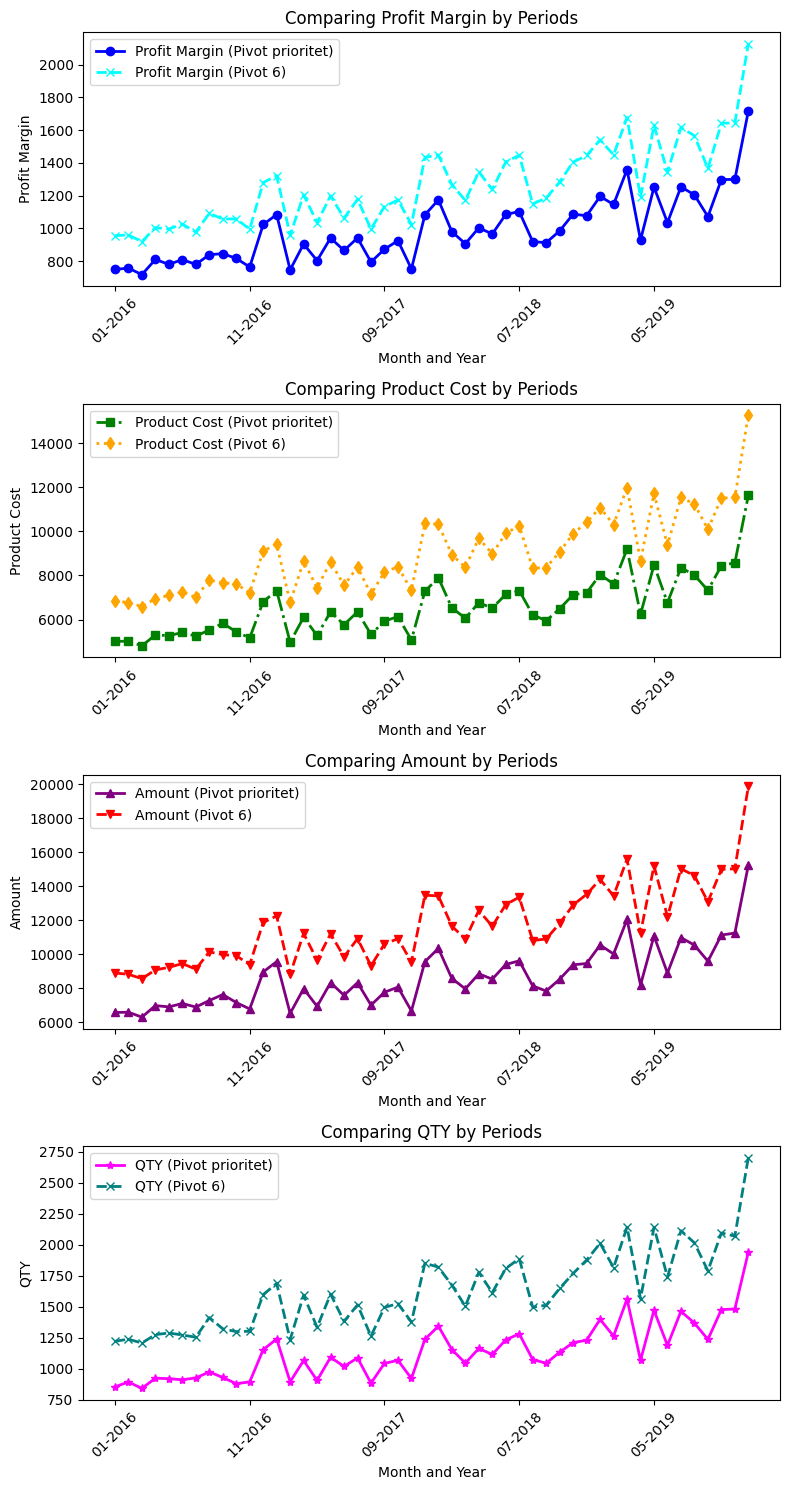

In [69]:
# Поєднання таблиць
combined_df = pd.merge(pivot_prioritet, pivot_table6, on='Month_Year', suffixes=('_prioritet', '_6'))

# Побудова графіка
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(8, 15))

# Перший графік для Profit Margin
combined_df.plot(x='Month_Year', y='Profit Margin_prioritet', kind='line', ax=ax1, color='blue', linewidth=2, marker='o', linestyle='-', label='Profit Margin (Pivot prioritet)')
combined_df.plot(x='Month_Year', y='Profit Margin_6', kind='line', ax=ax1, color='cyan', linewidth=2, marker='x', linestyle='--', label='Profit Margin (Pivot 6)')
ax1.set_title('Comparing Profit Margin by Periods')
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('Profit Margin')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Другий графік для Product Cost
combined_df.plot(x='Month_Year', y='Product Cost_prioritet', kind='line', ax=ax2, color='green', linewidth=2, marker='s', linestyle='-.', label='Product Cost (Pivot prioritet)')
combined_df.plot(x='Month_Year', y='Product Cost_6', kind='line', ax=ax2, color='orange', linewidth=2, marker='d', linestyle=':', label='Product Cost (Pivot 6)')
ax2.set_title('Comparing Product Cost by Periods')
ax2.set_xlabel('Month and Year')
ax2.set_ylabel('Product Cost')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

# Третій графік для Amount
combined_df.plot(x='Month_Year', y='Amount_prioritet', kind='line', ax=ax3, color='purple', linewidth=2, marker='^', linestyle='-', label='Amount (Pivot prioritet)')
combined_df.plot(x='Month_Year', y='Amount_6', kind='line', ax=ax3, color='red', linewidth=2, marker='v', linestyle='--', label='Amount (Pivot 6)')
ax3.set_title('Comparing Amount by Periods')
ax3.set_xlabel('Month and Year')
ax3.set_ylabel('Amount')
ax3.legend()
ax3.tick_params(axis='x', rotation=45)

# Четвертий графік для QTY
combined_df.plot(x='Month_Year', y='QTY_prioritet', kind='line', ax=ax4, color='magenta', linewidth=2, marker='*', linestyle='-', label='QTY (Pivot prioritet)')
combined_df.plot(x='Month_Year', y='QTY_6', kind='line', ax=ax4, color='teal', linewidth=2, marker='x', linestyle='--', label='QTY (Pivot 6)')
ax4.set_title('Comparing QTY by Periods')
ax4.set_xlabel('Month and Year')
ax4.set_ylabel('QTY')
ax4.legend()
ax4.tick_params(axis='x', rotation=45)

# Налаштування
plt.tight_layout()
plt.show()


In [70]:
# маржа та витрати по періодам

# Фильтрація даних за 2019 год

pivot_table6_2019 = pivot_table6[pivot_table6['Year'] == 2019]

# Сортування даних за 2019 год по Month

pivot_table6_2019 = pivot_table6_2019.sort_values(by='Month', ascending=True).reset_index(drop=True)

# результат

print(pivot_table6_2019)


   Month_Year  Month  Year  Profit Margin  Product Cost      Amount   QTY
0     01-2019      1  2019        1540.45      11081.37  14406.2642  2011
1     02-2019      2  2019        1448.89      10307.53  13438.1795  1815
2     03-2019      3  2019        1676.72      11990.44  15600.5177  2142
3     04-2019      4  2019        1189.75       8657.81  11245.5229  1565
4     05-2019      5  2019        1630.25      11722.28  15209.3634  2140
5     06-2019      6  2019        1343.01       9375.06  12209.2970  1739
6     07-2019      7  2019        1616.31      11541.10  15035.3638  2113
7     08-2019      8  2019        1565.65      11241.78  14626.0124  2015
8     09-2019      9  2019        1366.59      10096.19  13084.8950  1789
9     10-2019     10  2019        1641.95      11501.09  15000.1941  2095
10    11-2019     11  2019        1643.93      11552.35  15031.4609  2069
11    12-2019     12  2019        2126.81      15278.00  19886.9592  2703


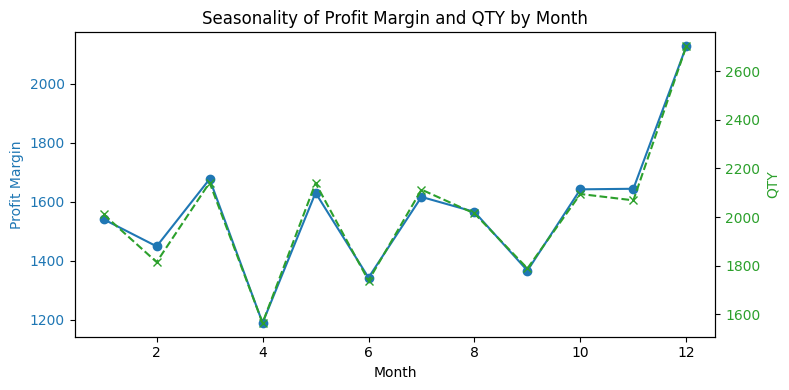

In [71]:
# Построение графиков
fig, ax1 = plt.subplots(figsize=(8, 4))

# График для Profit Margin
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Profit Margin', color=color)
ax1.plot(pivot_table6_2019['Month'], pivot_table6_2019['Profit Margin'], color=color, marker='o', linestyle='-', label='Profit Margin')
ax1.tick_params(axis='y', labelcolor=color)

# Создание второго осевого объекта для графика QTY
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('QTY', color=color)
ax2.plot(pivot_table6_2019['Month'], pivot_table6_2019['QTY'], color=color, marker='x', linestyle='--', label='QTY')
ax2.tick_params(axis='y', labelcolor=color)

# Заголовок
plt.title('Seasonality of Profit Margin and QTY by Month')

# Легенды
fig.tight_layout()
plt.show()

**Висновок 8:** Виділили з загальної бази товарів приорітетні щоб проаналізувати загальну динаміку. Бачимо відповідно до візуалізацій, що динаміка продажів, маржі та витрат на собівартість для всіх товарів та пріорітетних товарів має схожу динаміку. Бачимо що продажі та відповідно доходи нерівномірні, проте видно що загальна динаміка йде на приріст. Помітна сезонність на прикінці та початку року приріст, що можна повязати з новорічними святами. Суттєвий приріст помітно наприкінці 2019 року. Отже можна зробити висновок, що в період новорічних свят потрібно поповнювати склад для забезпечення попиту.  Додамо аналіз помісячний лише для 2019 року і бачимо зменшення продажів кожді 2 місяці, а потім йде збільшення. Потрібно з'ясувати спад кожні 2 місяці - це зовнішні фактори, чи якісь внутрішні накшталт: відсутність пріорітетних товарів - погана логістика та планування, недостатня кількість персоналу чи ще які фактори. Якщо з'ясувати природу факторів, що впливають на зниження продажів та прибутку, то це можна виправити, а значить напряму позитивно вплинути на збільшення продажів та прибутку.

**9. Питання:** Які товари краще вивести з оберту?

In [72]:
# Об'єднати таблиці за Category з використанням left join
merged_table1 = pd.merge(pivot_table5, categories_80_percent[['Category']], on='Category', how='left', indicator=True)

# Вибрати тільки ті записи, що присутні в pivot_table5, але відсутні в categories_80_percent
pivot_table9 = merged_table1[merged_table1['_merge'] == 'left_only']

# Видалити колонку _merge, якщо вона більше не потрібна
non_prioritet = pivot_table9.drop(columns=['_merge'])

# Перевірити результат
non_prioritet


,Category,Items,Description,% Profit Margin,% Product Cost,Month,Year,Month_Year,City,Brand,Price,Profit Margin,Product Cost,Amount,QTY
6,Health,H-two-O original isotonic dring-case,380 ml,0.084,0.766,12,2016,12-2016,Woodlands,H-two-O,26.96,18.12,165.21,211.3664,8
32,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,12,2018,12-2018,Bedok,Yakult,11.78,14.62,155.60,195.7836,17
79,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,3,2016,03-2016,Manila,Yakult,11.78,11.18,119.01,148.5458,13
108,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,10,2016,10-2016,Jakarta,Yakult,11.78,10.32,109.85,138.0616,12
109,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,7,2019,07-2019,Kuala Lumpur,Yakult,11.78,10.32,109.84,137.8260,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44145,Rice & Cooking Essentials,Saxa Sea salt,480 g,0.064,0.786,3,2019,03-2019,Manila,Saxa,1.22,0.08,0.96,1.2078,1
44147,Rice & Cooking Essentials,Saxa Sea salt,480 g,0.064,0.786,9,2018,09-2018,Jakarta,Saxa,1.22,0.08,0.96,1.1834,1
44148,Rice & Cooking Essentials,Morton Fine salt,280 g,0.064,0.786,4,2017,04-2017,Bedok,Morton,1.15,0.07,0.90,1.0925,1
44149,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,0.064,0.786,12,2018,12-2018,Manila,Lee Kum Kee,1.06,0.07,0.83,1.0176,1


In [73]:
# Відсортуємо вибірку по зростанню

non_prioritet_sort = non_prioritet.groupby(['Category', 'Items', 'Description', '% Profit Margin', '% Product Cost'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum().sort_values(by = 'Profit Margin', ascending = True).reset_index()

# Фільтрація записів, де Profit Margin менше 100

filtered_non_prioritet = non_prioritet_sort[non_prioritet_sort['Profit Margin'] < 100]

filtered_non_prioritet

,Category,Items,Description,% Profit Margin,% Product Cost,Profit Margin,Product Cost,Amount,QTY
0,Rice & Cooking Essentials,Morton Fine salt,280 g,0.064,0.786,0.07,0.90,1.0925,1
1,Household,Colorox Wiper dry sheet value pack,870 ml,0.053,0.797,0.08,1.21,1.4440,1
2,Rice & Cooking Essentials,Morton Fine salt,310 g,0.064,0.786,0.09,1.11,1.3395,1
3,Household,Arm & Hammer Fridge N Freezer baking soda,360 ml,0.053,0.797,0.09,1.42,1.7088,1
4,Household,Colorox Wiper dry sheet value pack,800 ml,0.053,0.797,0.09,1.43,1.7005,1
...,...,...,...,...,...,...,...,...,...
4556,Health,Monster Ultra violet energy drink,320 ml,0.084,0.766,19.25,175.52,223.3920,8
4557,Beverages,3 in 1 cereal drink original,560 g,0.082,0.768,20.03,187.42,235.1142,23
4558,Beverages,3 in 1 cereal drink original,800 g,0.082,0.768,21.66,202.67,256.2666,20
4559,Beverages,3 in 1 cereal drink original,680 g,0.082,0.768,25.07,234.61,295.3164,25


**Висновок 9:** У таблиці non_prioritet та non_prioritet_sort  наведено перелік товарів, що не є приорітетними, адже не ввійшли в групи товарів, що дають 80% маржі. У таблиці filtered_non_prioritet ті товари, маржа який за всі 4 роки була меньше 100 дол. З обома групами товарів потрібно попрацювати додатково. По-перше потрібно проаналізувати чи ці товари не нові, якщо нові провести якусь рекламну кампанію, якщо не нові та маржа меньше 100 дол то розпродати та вивести з оберту. По іншим непріорітетним теж детальніше подивитись можливо теж якусь частину потрібно вивести з оберту, якщо рекламна кампанія не окупиться. Після перегляду асортименту, можливо є сенс замінити якісь товари на більш затребувані. Також необхідно звернути увагу на те, якщо по непріорітетним попит є але маленька маржа з причини низької ціни чи високої собівартості, то ці показники необхідно додатково проаналізувати

**10. Питання:** Чи є різниця маржинального прибутку одного й того ж товару в різних містах?

In [74]:
# Групування по полям Category, Items, Description та розрахунок середнього та стандратного відхилення
grouped_data = pivot_table5.groupby(['Category', 'Items', 'Description', 'Brand'])[['% Profit Margin', '% Product Cost']].agg(['mean', 'std'])

# зкидання індексу для отримання простого DataFrame
grouped_data.columns = ['% Profit Margin Mean', '% Profit Margin Std', '% Product Cost Mean', '% Product Cost Std']
grouped_data = grouped_data.reset_index()

# поєднання статистик в одну таблицю
merged_data = pd.merge(pivot_table5, grouped_data, on=['Category', 'Items', 'Description', 'Brand'], how='left')

# розрахунок відхилення від середнього
merged_data['% Profit Margin Difference'] = merged_data['% Profit Margin'] - merged_data['% Profit Margin Mean']
merged_data['% Product Cost Difference'] = merged_data['% Product Cost'] - merged_data['% Product Cost Mean']

# Проверка суттєвих відхилельнь
merged_data['Significant % Profit Margin Difference'] = abs(merged_data['% Profit Margin Difference']) > 0.01
merged_data['Significant % Product Cost Difference'] = abs(merged_data['% Product Cost Difference']) > 0.01

# Фильтрация строк, где оба показателя значительны
filtered_data = merged_data[(merged_data['Significant % Profit Margin Difference']) &
                            (merged_data['Significant % Product Cost Difference'])]

# Висновок відфільтрованих даних
filtered_data1 = filtered_data[['Category', 'Items', 'Description', 'Brand', 'City', '% Profit Margin', '% Product Cost',
                     '% Profit Margin Difference', '% Product Cost Difference', '% Profit Margin Mean', '% Product Cost Mean', 'Significant % Profit Margin Difference', 'Significant % Product Cost Difference']]
filtered_data1



,Category,Items,Description,Brand,City,% Profit Margin,% Product Cost,% Profit Margin Difference,% Product Cost Difference,% Profit Margin Mean,% Product Cost Mean,Significant % Profit Margin Difference,Significant % Product Cost Difference
9395,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Woodlands,0.144,0.706,0.05175,-0.05175,0.09225,0.75775,True,True
9925,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Bedok,0.075,0.775,-0.01725,0.01725,0.09225,0.75775,True,True
28070,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Kuala Lumpur,0.075,0.775,-0.01725,0.01725,0.09225,0.75775,True,True
28072,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Manila,0.075,0.775,-0.01725,0.01725,0.09225,0.75775,True,True


In [75]:
filtered_data1.shape

print(f'Набір містить {filtered_data1.shape[0]} записи.')

Набір містить 4 записи.


**Висновок 10:** Бачимо, що є перелік товарів по яким є різниция по '% Profit Margin', '% Product Cost' в різних містах. В таблиці filtered_data1 бачимо 4 записи, тобто можемо сказати що не багато порівняно з загальним об'ємом товарів. Потрібно проаналізувати необхідність диференціювання ціноутворення для диференціювання маржі залежно від міста, можливо є більш туристичні міста чи більш туристичні локації, що дозволить збільшити ціну. Чи перенести магазин у більш туристичне місце для збільшення продажів та ціни. Чи можливо є варіант знизити % собівартості в якомусь з міст.

**11. Питання:** Чи є сенс відкривати он-лайн магазин? Потрібно проаналізувати чи частіше використовують Кеш чи картки

In [76]:
# виведемо співвідношення кількості оплат по видам оплат

Payments = df1['Payment Mode'].value_counts(normalize=True).reset_index()
Payments

,Payment Mode,proportion
0,Card,0.339948
1,Wallet,0.334358
2,Cash,0.325695


In [77]:
# виведемо інформацію по полям - назву та типи

print(Payments.columns)


Index(['Payment Mode', 'proportion'], dtype='object')


In [78]:
# для зручності аналізу по деяким полям змінемо тип даних

Payments['proportion'] = Payments['proportion'].astype('float')

In [79]:
# виведемо мінімальне значення

min_proportion = Payments['proportion'].min()

print(min_proportion)

0.32569480236292275


In [80]:
# знаходимо рядок з мінімальним значенням proportion

min_proportion_row = Payments[Payments['proportion'] == min_proportion]

# знаходимо значення Payment Mode для цього рядка

min_quantity_item = min_proportion_row['Payment Mode'].values[0]

print(min_quantity_item)

Cash


In [81]:
Payments1 = df1.groupby('Payment Mode')['Amount'].sum().sort_values(ascending=True).reset_index()

# Розрахуємо суму по полю 'Amount'
total_amount = df1['Amount'].sum()

# Розрахуємо долю способа оплати
Payments1['Amount Share'] = Payments1['Amount'] / total_amount

# Перевірка результату
print(Payments1)

  Payment Mode      Amount  Amount Share
0         Cash  179878.633      0.319281
1       Wallet  188853.860      0.335212
2         Card  194653.751      0.345507


In [82]:
min_payment_mode = Payments1.iloc[0]['Payment Mode']

print(f' Висновок: Найменьше кількість оплат по {min_quantity_item} та найменьша сума оплат по {min_payment_mode}.')

 Висновок: Найменьше кількість оплат по Cash та найменьша сума оплат по Cash.


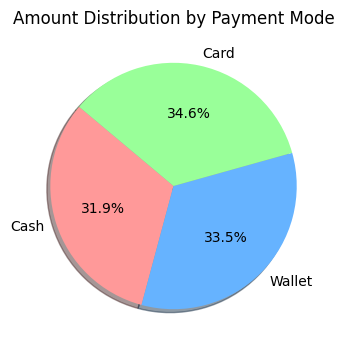

In [83]:
# для кращої візуалізації побудуємо кругову діаграму:

Payments1.plot.pie(y = 'Amount', labels = Payments1['Payment Mode'], colors=['#ff9999', '#66b3ff', '#99ff99'],
                      autopct = '%1.1f%%',shadow=True, startangle = 140,
                      legend = False, figsize = (4, 4))


plt.title('Amount Distribution by Payment Mode')
plt.ylabel('')  # прибрати мітку осі Y
plt.show()

**Висновок 11:** Враховуючі, що найменьше кількість оплат по Cash та найменьша сума оплат по Cash, то варто відкривати інтернет магазин, адже люди частіше користуються картою та гаманцем, а значить їм також буде зручно замовляти он-лайн.





**12. Питання:** Як налаштоване ціноутворення? Чи є різниця в ціні по тому ж самому товару?

In [84]:
# Аналізуємо 2019 рік

pivot_table5_2019 = pivot_table5[pivot_table5['Year'] == 2019]

# Групування по полям Category, Items, Description та розрахунок середнього

pivot_table11 = pivot_table5_2019.groupby(['Category', 'Items', 'Description', 'Brand'])['Price'].agg(['mean']).reset_index()

# Перейменування полів

pivot_table11.columns = ['Category', 'Items', 'Description', 'Brand', 'Price Mean']

In [85]:
# поєднання статистик в одну таблицю
merged_pivot11 = pd.merge(pivot_table5_2019, pivot_table11, on=['Category', 'Items', 'Description', 'Brand'], how='left')

# розрахунок відхилення від середнього
merged_pivot11['Price Difference'] = merged_pivot11['Price'] - merged_pivot11['Price Mean']


# Проверка суттєвих відхилельнь
merged_pivot11['Significant Price Difference'] = abs(merged_pivot11['Price Difference']) == 0

# Фильтрация строк, где оба показателя значительны
filtered_for_price = merged_pivot11[(merged_pivot11['Significant Price Difference'])]

# Висновок відфільтрованих даних
filtered_for_price1 = filtered_for_price[['Category', 'Items', 'Description', 'Brand', 'City', 'Price', '% Profit Margin', '% Product Cost', 'Price Mean', 'Significant Price Difference']]
filtered_for_price1

,Category,Items,Description,Brand,City,Price,% Profit Margin,% Product Cost,Price Mean,Significant Price Difference
1,"Wines, Beers & Spirits",Bollinger Pink platted moscato rose,750 ml,Bollinger,Kuala Lumpur,39.04,0.084,0.766,39.04,True
2,Frozen,Seafood canadian scallops,540 g,Catch Seafood,Kuala Lumpur,22.15,0.146,0.704,22.15,True
4,Frozen,Seafood canadian scallops,350 g,Suhyup,Kuala Lumpur,15.81,0.146,0.704,15.81,True
5,"Wines, Beers & Spirits",Ashai Lager Beer,480 ml,Ashai,Jakarta,11.60,0.118,0.732,11.60,True
6,"Wines, Beers & Spirits",Ashai Lager Beer,480 ml,Ashai,Manila,11.60,0.118,0.732,11.60,True
...,...,...,...,...,...,...,...,...,...,...
13337,Bakery & Breakfast,Hokkaido Milk Toast Bread,845g,Gardenia,Jakarta,1.03,0.075,0.775,1.03,True
13338,"Choco, Snacks, Sweets",Eclipse Sugarfree peppermint Mints,350 g,Eclipse,Jakarta,1.32,0.060,0.790,1.32,True
13339,Rice & Cooking Essentials,Saxa Sea salt,480 g,Saxa,Manila,1.22,0.064,0.786,1.22,True
13340,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,Lee Kum Kee,Jakarta,1.06,0.064,0.786,1.06,True


In [86]:
print(f'Таблиця filtered_for_price1 містить {filtered_for_price1.shape[0]} записів.')

Таблиця filtered_for_price1 містить 12739 записів.


In [87]:
print(f'Таблиця pivot_table5_2019 містить {pivot_table5_2019.shape[0]} записів.')

Таблиця pivot_table5_2019 містить 13342 записів.


In [88]:
# розрахуємо відсоток бази продажів 2019 року, коли ціна була однакова в різних містах

percent_price = (filtered_for_price1.shape[0] / pivot_table5_2019.shape[0]) * 100

percent_price = round(percent_price, 2)

print(f'Таблиця pivot_table5_2019 містить {percent_price} відсотків даних по яким ціна однакова у різних містах по тому самому товару.')

Таблиця pivot_table5_2019 містить 95.48 відсотків даних по яким ціна однакова у різних містах по тому самому товару.


**Висновок 12:** Бачимо в базі продажів 2019 року 95,48% однакових товарів у різних містах мають однакову ціну. Потрібно проаналізувати, чи можемо в якомусь місті збільшити ціну і в який спосіб для подальшого збільшення маржі. Можливо порівняти ще ціни у нашому магазині з цінами інших магазинів в тих містах, де наші магазини, щоб впевнитись, що наші ціни не занижені. Чи можливо у нашої компанії політика, як рекламний хід що ціни майже однакові, з розподілом рівномірно собівартості між товаром? Адже в аналізі Питання 10 ми побачили, що % маржі та % собівартості майже не відрізняється по одному й тому ж товару. Скоріше всього сумма маржі змінюється відповідно до кількості купленого товару та з урахуванням того чи була знижка, а не за рахунок ціни.

**13. Питання:** Чи можемо виявити постійних клієнтів?

In [89]:
# Згрупуємо дані по Membership ID

regular_customers = df1['Membership ID'].value_counts().sort_values( ascending=False).reset_index()

# Обираємо топ-35 клієнтів
regular_customers_35 = regular_customers.head(35)
regular_customers_35

,Membership ID,count
0,MIDPH0241,108
1,MIDPH0036,96
2,MIDPH0028,94
3,MIDPH0106,93
4,MIDPH0015,91
5,MIDPH0133,84
6,MIDMY0302,82
7,MIDMY0359,81
8,MIDMY0143,81
9,MIDMY0102,80


In [90]:
# Формуємо базу лише 2019 року

df1_2019 = df1[df1['Year'] == 2019]

In [91]:
# Поєднуємо дві таблиці по полю Membership ID

pivot_table12 = pd.merge(df1_2019, regular_customers_35[['Membership ID']], on='Membership ID', how='inner')
pivot_table12

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,Amount_check,GrossBillAmount1,GrossBillAmount_check,NetBillAmount1,NetBillAmount_check,GrossBillAmount2,Date_time,Hour,Time_of_Day,Month_Year
0,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,43,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
1,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,44,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
2,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,44,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
3,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,45,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
4,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,46,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,GSW01512,2019-12-11,2019,12,14:32:44.027000,9924527557,MIDSG0838,89,24,Male,...,0.0,92.947904,0.0,86.8672,0.000000e+00,92.947904,2019-12-11 14:32:44.027,14,afternoon,12-2019
817,GSW01518,2019-12-20,2019,12,16:39:07.475000,9866859186,MIDSG0188,68,29,Female,...,0.0,54.873024,0.0,35.5968,-1.568640e+01,38.088576,2019-12-20 16:39:07.475,16,afternoon,12-2019
818,GSW01518,2019-12-20,2019,12,16:39:07.475000,9866859186,MIDSG0188,69,29,Female,...,0.0,54.873024,0.0,35.5968,-1.568640e+01,38.088576,2019-12-20 16:39:07.475,16,afternoon,12-2019
819,GSW01518,2019-12-20,2019,12,16:39:07.475000,9866859186,MIDSG0188,70,29,Female,...,0.0,54.873024,0.0,35.5968,-1.568640e+01,38.088576,2019-12-20 16:39:07.475,16,afternoon,12-2019


In [92]:
# Групування по полю Gender та сума  по Amount
gender_35 = pivot_table12.groupby(['Gender'])[['Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()

# Розрахунок загальної суми Amount
total_amount = gender_35['Amount'].sum()

# Додавання колонки Percentage
gender_35['Percentage'] = (gender_35['Amount'] / total_amount) * 100

# Округлення
gender_35['Percentage'] = gender_35['Percentage'].round(2)

print(gender_35)

   Gender     Amount  Percentage
0  Female  5711.8152       64.12
1    Male  3195.9682       35.88


In [93]:
# Gender що частіше купує

gender_35_max = gender_35.iloc[0]['Gender']

In [94]:
 # Gender що частіше купує на другому місці

 gender_35_min = gender_35.iloc[1]['Gender']
 gender_35_min

'Male'

In [95]:
 # на скільки одна стать купує частіше ніж інша серед постійних покупців

 Percentage_calc = (((gender_35.iloc[0]['Percentage'] - gender_35.iloc[1]['Percentage'])/gender_35.iloc[1]['Percentage'])*100).round(2)

In [96]:
# Визначемо вік постійних клієнтів

age_35 = pivot_table12.groupby(['Age'])[['Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()

age_35

,Age,Amount
0,26,822.8151
1,24,664.4966
2,20,611.0005
3,19,605.4966
4,51,600.4263
5,25,535.8560
6,38,531.2432
7,17,487.8576
8,45,449.0988
9,50,432.8244


**Висновок 13:**

In [97]:
print(f'Висновок 13: При аналізі постійних покупців бачимо, що з них частіше {gender_35_max} купують. Серед постійних покупців {gender_35_max} купують частіше ніж {gender_35_min} на {Percentage_calc} відсотків. Серед постійних покупців багато молодих та середнього віку. Всі постійні покупці не пенсійного віку. Отже можемо сказати, що можливо жінки роблять неплановані покупки,тому потрібно переглянути який товар вони частіше купують та зробити на ньому акцент. А також те що постійні покупці не пенсійного віку говорить про те що це як раз платоспроможна частина населення, їх купівельна спроможність вище, а отже це добре і розширення асортименту буде доречним')

Висновок 13: При аналізі постійних покупців бачимо, що з них частіше Female купують. Серед постійних покупців Female купують частіше ніж Male на 78.71 відсотків. Серед постійних покупців багато молодих та середнього віку. Всі постійні покупці не пенсійного віку. Отже можемо сказати, що можливо жінки роблять неплановані покупки,тому потрібно переглянути який товар вони частіше купують та зробити на ньому акцент. А також те що постійні покупці не пенсійного віку говорить про те що це як раз платоспроможна частина населення, їх купівельна спроможність вище, а отже це добре і розширення асортименту буде доречним


**14. Питання:** Який середній чек?

In [98]:
check = df1.groupby(['Receipt Number'])[['Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()
check

,Receipt Number,Amount
0,GMK02821,527.6680
1,GMK02820,508.6848
2,GSW01526,494.1471
3,GMK02819,488.6739
4,GSW00269,449.7220
...,...,...
13043,GMK01466,1.0282
13044,GIJ00195,1.0176
13045,GMK01641,1.0098
13046,GSW01115,0.9999


In [99]:
check_mean = check['Amount'].mean().round(2)

print(f'Середній чек: {check_mean}')


Середній чек: 43.18


**Висновок 14:** Середній чек 43,18

Вивантажити df1 в Excel для подальшої роботи Tableаu

In [100]:
# Предположим, что ваш DataFrame называется pivot_table12
df1.to_excel('df1.xlsx', index=False)

# Скачивание файла на локальный компьютер
from google.colab import files
files.download('df1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Метрики:https://docs.google.com/document/d/1bjH4Fy8b_RgdwwupBgopsu467eQyoGL9QV5Oor1l2WY/edit

Tableаu:(https://public.tableau.com/app/profile/tera.aga/viz/FinalProject_17234451743350/Grocerystoresalesanalysis#1)